## 🎗️ Breast Cancer Detection  

In [ ]:
!pip install tensorflow keras numpy pandas matplotlib pillow opencv-python streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00


In [ ]:
import os

# Setup Kaggle API
os.makedirs('/root/.kaggle', exist_ok=True)

# Upload your kaggle.json here (Colab will prompt you to upload)
from google.colab import files
files.upload()  # Upload your kaggle.json file when prompted

# Move and set permissions
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d aryashah2k/breast-ultrasound-images-dataset
!unzip breast-ultrasound-images-dataset.zip -d breast_cancer_data


Dataset URL: https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset
License(s): CC0-1.0
 64% 124M/195M [00:00<00:00, 1.29GB/s]
100% 195M/195M [00:00<00:00, 784MB/s] 
Archive:  breast-ultrasound-images-dataset.zip
  inflating: breast_cancer_data/Dataset_BUSI_with_GT/benign/benign (1).png  
  inflating: breast_cancer_data/Dataset_BUSI_with_GT/benign/benign (1)_mask.png  
  inflating: breast_cancer_data/Dataset_BUSI_with_GT/benign/benign (10).png  
  inflating: breast_cancer_data/Dataset_BUSI_with_GT/benign/benign (10)_mask.png  
  inflating: breast_cancer_data/Dataset_BUSI_with_GT/benign/benign (100).png  
  inflating: breast_cancer_data/Dataset_BUSI_with_GT/benign/benign (100)_mask.png  
  inflating: breast_cancer_data/Dataset_BUSI_with_GT/benign/benign (100)_mask_1.png  
  inflating: breast_cancer_data/Dataset_BUSI_with_GT/benign/benign (101).png  
  inflating: breast_cancer_data/Dataset_BUSI_with_GT/benign/benign (101)_mask.png  
  inflating: breast_cancer_data/Da

In [ ]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

def load_images(data_dir, img_size=(150, 150)):
    images = []
    labels = []
    class_names = {'benign': 0, 'malignant': 1, 'normal': 2}

    for class_name, label in class_names.items():
        class_path = os.path.join(data_dir, class_name)
        for img_file in os.listdir(class_path):
            if img_file.endswith('.png'):
                img_path = os.path.join(class_path, img_file)
                img = cv2.imread(img_path)
                img = cv2.resize(img, img_size)
                img = img / 255.0  # Normalize pixel values (0-1)
                images.append(img)
                labels.append(label)

    return np.array(images), np.array(labels)

# Load the dataset
data_dir = '/content/breast_cancer_data/Dataset_BUSI_with_GT'
X, y = load_images(data_dir)

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (1262, 150, 150, 3)
Test data shape: (316, 150, 150, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_model():
    model = Sequential([
        # First Conv Block
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D((2, 2)),

        # Second Conv Block
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        # Third Conv Block
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        # Classifier
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),  # Helps prevent overfitting
        Dense(3, activation='softmax')  # 3 output classes (benign, malignant, normal)
    ])

    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

    return model

model = build_model()
model.summary()  # Shows model structure

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,739 (18.42 MB)

 Trainable params: 4,828,739 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=15,
                    validation_data=(X_test, y_test))


Epoch 1/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.4814 - loss: 1.0988 - val_accuracy: 0.6392 - val_loss: 0.7356
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.6496 - loss: 0.7503 - val_accuracy: 0.6741 - val_loss: 0.7054
Epoch 3/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.7154 - loss: 0.6522 - val_accuracy: 0.7500 - val_loss: 0.6174
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.7507 - loss: 0.5502 - val_accuracy: 0.7310 - val_loss: 0.6040
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.7894 - loss: 0.4565 - val_accuracy: 0.7595 - val_loss: 0.6340
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.8079 - loss: 0.4226 - val_accuracy: 0.7975 - val_loss: 0.6448
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.8671 - loss: 0.3183 - val_accuracy: 0.8228 - val_loss: 0.6028
Epoch 8/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9025 - loss: 0.2446 - val_accuracy: 0.7722 - val_loss:

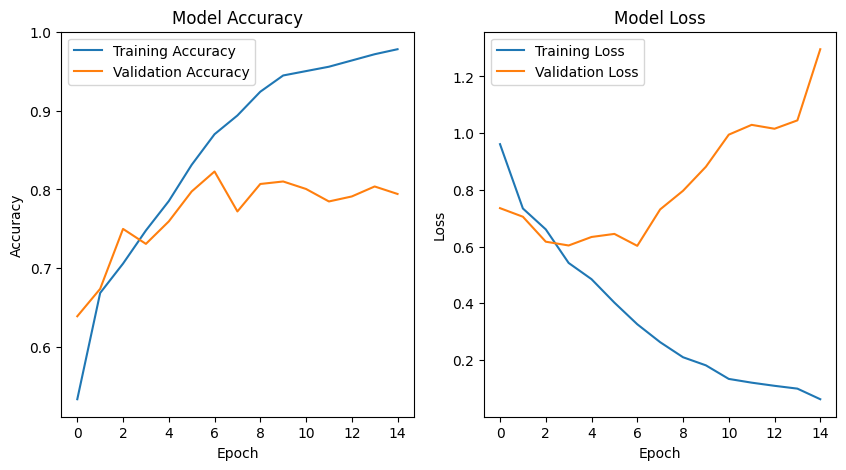

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 344ms/step - accuracy: 0.8062 - loss: 1.2221
Test Accuracy: 79.43%


In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Test accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

In [ ]:
model.save('breast_cancer_model.h5')

# 🏥 Pneumonia Detection (Chest X-rays)  
**Objective:** Train a CNN to classify Normal vs. Pneumonia X-rays.  
- Dataset: Chest X-Ray Images (Pneumonia)  
- Model: Binary CNN Classifier  

In [ ]:
# Download the Pneumonia dataset from Kaggle
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip chest-xray-pneumonia.zip -d pneumonia_data

Streaming output truncated to the last 5000 lines.
  inflating: pneumonia_data/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: pneumonia_data/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: pneumonia_data/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: pneumonia_data/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: pneumonia_data/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: pneumonia_data/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: pneumonia_data/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: pneumonia_data/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: pneumonia_data/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: pneumonia_data/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: pneumonia_data/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: pneumonia_data/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: pneumonia_data/chest_xray/train/NORMAL/IM-0444-

In [ ]:
def load_pneumonia_data(data_dir, img_size=(150, 150)):
    images = []
    labels = []
    classes = {'NORMAL': 0, 'PNEUMONIA': 1}  # 0 = Normal, 1 = Pneumonia

    for class_name, label in classes.items():
        class_path = os.path.join(data_dir, 'train', class_name)
        for img_file in os.listdir(class_path):
            if img_file.endswith('.jpeg'):
                img_path = os.path.join(class_path, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
                img = cv2.resize(img, img_size)
                img = np.expand_dims(img, axis=-1)  # Add channel dimension (150x150x1)
                img = img / 255.0  # Normalize
                images.append(img)
                labels.append(label)

    return np.array(images), np.array(labels)

# Load the data
pneumonia_dir = '/content/pneumonia_data/chest_xray'
X_pneumonia, y_pneumonia = load_pneumonia_data(pneumonia_dir)

# Split into train (80%) and test (20%)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_pneumonia, y_pneumonia, test_size=0.2, random_state=42
)

print("Training shape:", X_train_p.shape)
print("Test shape:", X_test_p.shape)

Training shape: (4172, 150, 150, 1)
Test shape: (1044, 150, 150, 1)


In [ ]:
def build_pneumonia_model(input_shape=(150, 150, 1)):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification (0 or 1)
    ])

    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    return model

pneumonia_model = build_pneumonia_model()
pneumonia_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,827,905 (18.42 MB)

 Trainable params: 4,827,905 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_p = pneumonia_model.fit(
    X_train_p, y_train_p,
    epochs=10,
    validation_data=(X_test_p, y_test_p)
)

Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.7333 - loss: 0.6026 - val_accuracy: 0.9387 - val_loss: 0.2325
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - accuracy: 0.8738 - loss: 0.2608 - val_accuracy: 0.9473 - val_loss: 0.2016
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.9263 - loss: 0.1930 - val_accuracy: 0.9598 - val_loss: 0.1287
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.9517 - loss: 0.1495 - val_accuracy: 0.9033 - val_loss: 0.2770
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.9524 - loss: 0.1426 - val_accuracy: 0.9617 - val_loss: 0.1272
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 245s 1s/step - accuracy: 0.9590 - loss: 0.1248 - val_accuracy: 0.9693 - val_loss: 0.1024
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.9700 - loss: 0.0832 - val_accuracy: 0.9741 - val_loss: 0.0873
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.9721 - loss: 0.0916 - val_accu

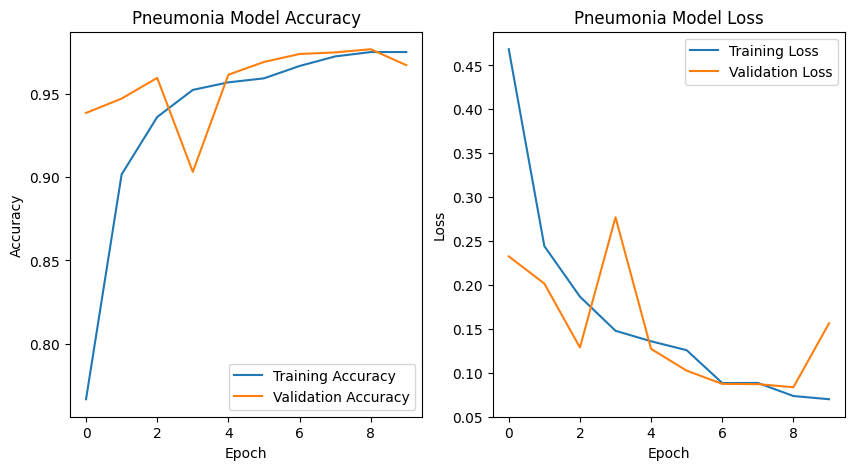

33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 392ms/step - accuracy: 0.9659 - loss: 0.2022
Pneumonia Test Accuracy: 96.74%


In [ ]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_p.history['accuracy'], label='Training Accuracy')
plt.plot(history_p.history['val_accuracy'], label='Validation Accuracy')
plt.title('Pneumonia Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_p.history['loss'], label='Training Loss')
plt.plot(history_p.history['val_loss'], label='Validation Loss')
plt.title('Pneumonia Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Test accuracy
test_loss_p, test_acc_p = pneumonia_model.evaluate(X_test_p, y_test_p)
print(f"Pneumonia Test Accuracy: {test_acc_p * 100:.2f}%")

In [ ]:
pneumonia_model.save('pneumonia_model.h5')


# New Section

## 🦠 Malaria Detection (Blood Smear Images)  
**Objective:** Train a CNN to detect malaria-infected red blood cells.  
- Dataset: [Malaria Cell Images Dataset](https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria)  
- Model: Binary CNN Classifier (Parasitized vs Uninfected)  

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()  # Upload your kaggle.json file here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"moseswarega","key":"cb07cc6005c559e1ac29c5140a8a38ca"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria


Dataset URL: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria
License(s): unknown
 98% 661M/675M [00:07<00:00, 183MB/s]
100% 675M/675M [00:07<00:00, 97.9MB/s]


In [ ]:
!unzip cell-images-for-detecting-malaria.zip -d malaria_data

Streaming output truncated to the last 5000 lines.
  inflating: malaria_data/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: malaria_data/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: malaria_data/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: malaria_data/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: malaria_data/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: malaria_data/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: malaria_data/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: malaria_data/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: malaria_data/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.p

In [ ]:
# Fix the nested folder structure
!mv malaria_data/cell-images/cell-images/* malaria_data/
!rm -r malaria_data/cell-images

mv: cannot stat 'malaria_data/cell-images/cell-images/*': No such file or directory
rm: cannot remove 'malaria_data/cell-images': No such file or directory


In [ ]:
!ls malaria_data  # Should show 'Parasitized' and 'Uninfected' folders
!ls malaria_data/Parasitized | head -5  # Sample parasitized images
!ls malaria_data/Uninfected | head -5   # Sample healthy cell images

cell_images
ls: cannot access 'malaria_data/Parasitized': No such file or directory
ls: cannot access 'malaria_data/Uninfected': No such file or directory


In [ ]:
!ls -R malaria_data  # Shows recursive directory contents

Streaming output truncated to the last 5000 lines.
C236ThinF_IMG_20151127_102428_cell_116.png
C236ThinF_IMG_20151127_102428_cell_118.png
C236ThinF_IMG_20151127_102428_cell_126.png
C236ThinF_IMG_20151127_102428_cell_134.png
C236ThinF_IMG_20151127_102428_cell_141.png
C236ThinF_IMG_20151127_102428_cell_168.png
C236ThinF_IMG_20151127_102428_cell_175.png
C236ThinF_IMG_20151127_102428_cell_183.png
C236ThinF_IMG_20151127_102428_cell_221.png
C236ThinF_IMG_20151127_102428_cell_222.png
C236ThinF_IMG_20151127_102428_cell_87.png
C236ThinF_IMG_20151127_102428_cell_91.png
C236ThinF_IMG_20151127_102516_cell_104.png
C236ThinF_IMG_20151127_102516_cell_13.png
C236ThinF_IMG_20151127_102516_cell_146.png
C236ThinF_IMG_20151127_102516_cell_168.png
C236ThinF_IMG_20151127_102516_cell_177.png
C236ThinF_IMG_20151127_102516_cell_179.png
C236ThinF_IMG_20151127_102516_cell_186.png
C236ThinF_IMG_20151127_102516_cell_20.png
C236ThinF_IMG_20151127_102516_cell_219.png
C236ThinF_IMG_20151127_102516_cell_236.png
C236Thi

In [ ]:
# Fix the path to match the actual extracted structure
!mv malaria_data/cell_images/* malaria_data/
!rm -r malaria_data/cell_images

# Verify the corrected structure
!ls malaria_data  # Should now show 'Parasitized' and 'Uninfected'

mv: cannot move 'malaria_data/cell_images/cell_images' to 'malaria_data/cell_images': Directory not empty
Parasitized  Uninfected


In [ ]:
# Verify the correct structure exists
!ls malaria_data  # This should show 'Parasitized' and 'Uninfected'

# Proceed directly to data loading
import cv2
import numpy as np
import os

def load_malaria_data(data_dir, img_size=(100, 100), sample_size=1000):
    images = []
    labels = []
    classes = {'Parasitized': 1, 'Uninfected': 0}

    for class_name, label in classes.items():
        class_path = os.path.join(data_dir, class_name)
        print(f"Loading images from: {class_path}")  # Debug print

        image_files = [f for f in os.listdir(class_path) if f.endswith('.png')][:sample_size]
        print(f"Found {len(image_files)} images")  # Debug print

        for img_file in image_files:
            img_path = os.path.join(class_path, img_file)
            img = cv2.imread(img_path)
            if img is not None:  # Only process if image loaded correctly
                img = cv2.resize(img, img_size)
                img = img / 255.0  # Normalize
                images.append(img)
                labels.append(label)

    return np.array(images), np.array(labels)

# Load the data
X_malaria, y_malaria = load_malaria_data('/content/malaria_data')
print(f"\nSuccessfully loaded {len(X_malaria)} images")
print(f"Class distribution: {np.bincount(y_malaria)} (0=Uninfected, 1=Parasitized)")

Parasitized  Uninfected
Loading images from: /content/malaria_data/Parasitized
Found 1000 images
Loading images from: /content/malaria_data/Uninfected
Found 1000 images

Successfully loaded 2000 images
Class distribution: [1000 1000] (0=Uninfected, 1=Parasitized)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_malaria,
    y_malaria,
    test_size=0.2,
    random_state=42,
    stratify=y_malaria  # Maintains class balance
)

print(f"Training samples: {X_train.shape}")
print(f"Test samples: {X_test.shape}")

Training samples: (1600, 100, 100, 3)
Test samples: (400, 100, 100, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

def build_malaria_model():
    model = Sequential([
        # Block 1
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(100,100,3)),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.2),

        # Block 2
        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.3),

        # Block 3
        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.4),

        # Classifier
        Flatten(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary output
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', 'Precision', 'Recall']
    )

    return model

malaria_model = build_malaria_model()
malaria_model.summary()  # Shows model architecture

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100, 100, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,814,273 (18.36 MB)

 Trainable params: 4,813,313 (18.36 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.1, patience=3, verbose=1)
]

history = malaria_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - Precision: 0.6249 - Recall: 0.6198 - accuracy: 0.6223 - loss: 0.6826 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 9.5093 - learning_rate: 1.0000e-04
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - Precision: 0.6469 - Recall: 0.6529 - accuracy: 0.6581 - loss: 0.6666 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 13.4642 - learning_rate: 1.0000e-04
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - Precision: 0.6427 - Recall: 0.6462 - accuracy: 0.6694 - loss: 0.6467 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 17.3452 - learning_rate: 1.0000e-04
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - Precision: 0.7136 - Recall: 0.6872 - accuracy: 0.6992 - loss: 0.6394
Epoch 4: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
50/50 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - Precision: 0.7131 - Recall: 

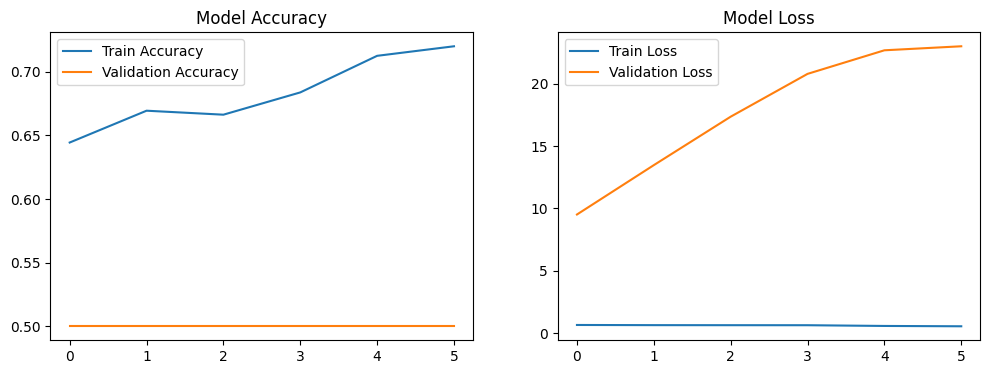

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 366ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.5167 - loss: 9.1935

Test Accuracy: 50.00%
Precision: 0.00%
Recall: 0.00%


In [17]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

# Evaluate metrics
test_loss, test_acc, test_precision, test_recall = malaria_model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")
print(f"Precision: {test_precision*100:.2f}%")  # True positives / (True + False positives)
print(f"Recall: {test_recall*100:.2f}%")       # True positives / (True positives + False negatives)

In [18]:
import numpy as np
print("Training class counts:", np.bincount(y_train))
print("Test class counts:", np.bincount(y_test))

Training class counts: [800 800]
Test class counts: [200 200]


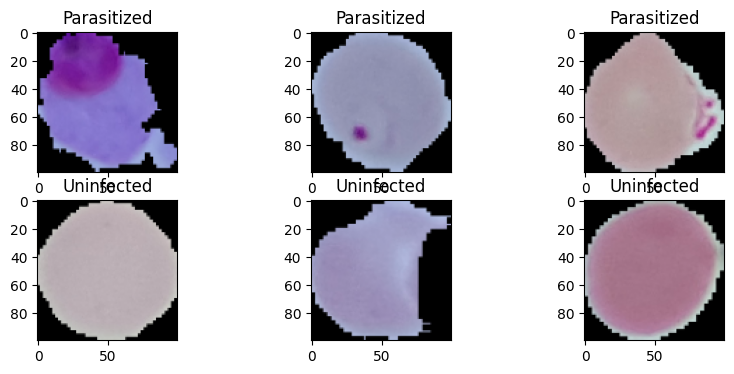

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
for i in range(3):
    # Parasitized
    plt.subplot(2, 3, i+1)
    plt.imshow(X_train[y_train == 1][i])
    plt.title("Parasitized")
    # Uninfected
    plt.subplot(2, 3, i+4)
    plt.imshow(X_train[y_train == 0][i])
    plt.title("Uninfected")
plt.show()

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def build_simple_model():
    model = Sequential([
        Conv2D(16, (3,3), activation='relu', input_shape=(100,100,3)),
        MaxPooling2D((2,2)),
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

simple_model = build_simple_model()
simple_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 98, 98, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 49, 49, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 47, 47, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16928)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     1,083,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,088,609 (4.15 MB)

 Trainable params: 1,088,609 (4.15 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

history = simple_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=15
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 31s 460ms/step - accuracy: 0.5106 - loss: 0.7849 - val_accuracy: 0.5550 - val_loss: 0.6874
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 354ms/step - accuracy: 0.5515 - loss: 0.6856 - val_accuracy: 0.6225 - val_loss: 0.6461
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 410ms/step - accuracy: 0.6484 - loss: 0.6474 - val_accuracy: 0.6075 - val_loss: 0.6349
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 346ms/step - accuracy: 0.6560 - loss: 0.6273 - val_accuracy: 0.6400 - val_loss: 0.6207
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 340ms/step - accuracy: 0.7005 - loss: 0.5879 - val_accuracy: 0.6750 - val_loss: 0.5791
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 353ms/step - accuracy: 0.7163 - loss: 0.5740 - val_accuracy: 0.7375 - val_loss: 0.5545
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 345ms/step - accuracy: 0.7479 - loss: 0.5484 - val_accuracy: 0.7500 - val_loss: 0.5161
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 341ms/step - accuracy: 0.7781 - loss: 0.5151 - val_accu

In [22]:
test_loss, test_acc = simple_model.evaluate(X_test, y_test)
print(f"New Test Accuracy: {test_acc*100:.2f}%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9202 - loss: 0.1889
New Test Accuracy: 92.50%


In [23]:
malaria_model.save('malaria_model_final.h5')  # Save the trained model
from google.colab import files
files.download('malaria_model_final.h5')     # Download to my machine

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>